In [58]:
import numpy as np
import scipy.misc as scm
import matplotlib.pyplot as plt

In [59]:
N = 1000
X=np.zeros((784,3*N))
C=np.zeros((3*N,3))
digit_prefix=['d1','d2','d3']
for i,dp in enumerate(digit_prefix):
    val_rgb=np.zeros((3,))
    val_rgb[i]=1.0
    for j in range(N):
        X[:,i*N+j]=np.float64(scm.imread('mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())
        C[i*N+j]=val_rgb

In [60]:
mu = np.mean(X, axis = 1)
X_1=X[:,:N]
X_2=X[:,N:2*N]
X_3=X[:,2*N:3*N]

X1c=X_1-np.expand_dims(np.mean(X_1,axis=1), 1)
X2c=X_2-np.expand_dims(np.mean(X_2,axis=1), 1)
X3c=X_3-np.expand_dims(np.mean(X_3,axis=1), 1)

S_w=(np.dot(X1c,X1c.T)+np.dot(X2c,X2c.T)+np.dot(X3c,X3c.T))
X_c = np.concatenate((X1c,X2c,X3c), axis = 1)

In [61]:
X1t=X_1-np.expand_dims(mu, 1)
X2t=X_2-np.expand_dims(mu, 1)
X3t=X_3-np.expand_dims(mu, 1)

S_T = np.dot(X1t,X1t.T) + np.dot(X2t,X2t.T) + np.dot(X3t,X3t.T)
S_b = S_T - S_w

Because $\hat{U} = \mathop{argmax}_{U^T U = I_k} tr(U^T S_b U) - \beta tr(U^T S_w U)$
$ = \mathop{argmax}_{U^T U = I_k} tr(U^T S_b U - \beta U^T S_w U) $
$ = \mathop{argmax}_{U^T U = I_k} tr[U^T (S_b - \beta S_w) U] $

So a well-known solution to this kind of problem is to do the EVD of $(S_b - \beta S_w)$, then we pick $k$ column eigenvectors $v_1, v_2, \ldots, v_k$ corresponding to the largest $k$ eigenvalues $\sigma_1, \ldots, \sigma_k$, and form them in matrix form $[v_1, v_2, \ldots, v_k] = \hat{U}$ and use it to project the original data to $k$-dimensional space $\hat{U}^T X$

In [62]:
k = 2
def FLDA(beta):
    w,v = np.linalg.eig(S_b - beta*S_w)
#     print(np.linalg.det(S_b - beta*S_w))
    w_sort = np.argsort(w)[::-1][:k]
#     print(w[w_sort])
    U = v[:,w_sort]
#     print(np.dot(U.T,U))
    Scores = np.dot(U.T, X)
    return Scores

/home/eddiesyn/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


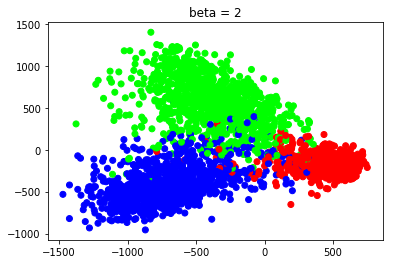

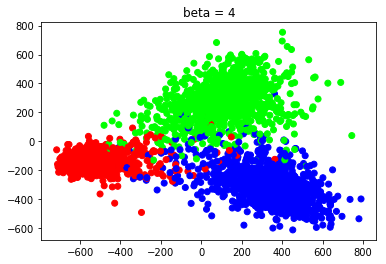

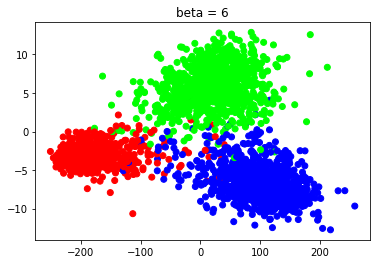

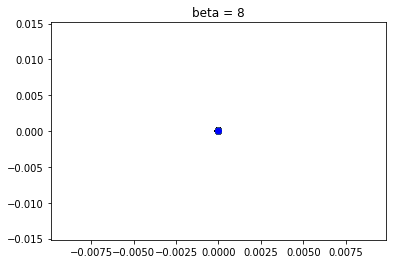

In [63]:
idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
Beta = [2,4,6,8]
for i,beta in enumerate(Beta):
    Scores = FLDA(beta)
    plt.figure()
    plt.scatter(Scores[0,idx_new],Scores[1,idx_new],c=C[idx_new])
    plt.title('beta = ' + str(beta))
plt.show()   

As the plots showed aboved, the interpretation is like this: 

Our project matrix $U$ is dependent on the between scatter $S_b$ and the within class scatter $S_w$. We can consider $\beta$ as the weight of $S_w$ when doing maximization. So when increasing the value of $\beta$, the influence of $S_w$ will be heavier and the influence of $S_b$ will be relatively lighter, so the data seperation will look better, which means each class will be more contracted, and different classes will be more seperated. This progress can be told by increasing $\beta$ from 2 to 6 as the first 3 plots shows. For $\beta = 8$, the eigenvalue of $S_b - \beta S_w$ are all near zero, even choosing the biggest two. So after projecting the data with it, the data will be compressed to near zero, hence the property of eigenvector and eigenvalue.  